# Dimension reduction

## Principle component analysis (PCA)

### scratch code

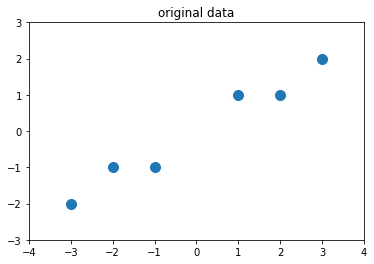

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [5]:
#차원을 줄이지 않고 pca를 쓰면 직교하는 좌표계로 변환하기 만 함

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [7]:
w, U = np.linalg.eig(pca.get_covariance())

In [8]:
U.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

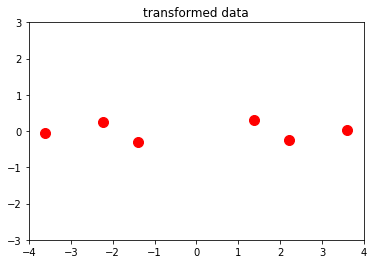

In [9]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

In [11]:
# Z[:,1]을 빼버린 것과 같다
#즉 직교하는 차원에서 분산이 작은 좌표들을 생략해 버리는 것

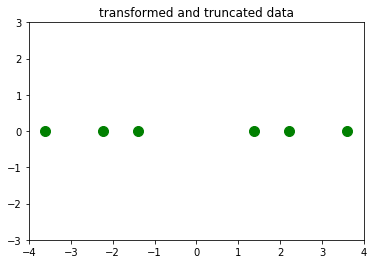

In [12]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

### PCA - IRIS data

In [307]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data)

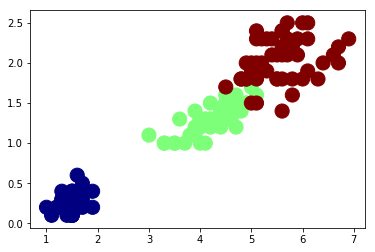

In [281]:
plt.scatter(X[2], X[3], c=iris.target, s=200, cmap=plt.cm.jet); #2, 3 변수로 플로팅 #두 변수 (2차원 상황을 일단 보려고)

In [282]:
model1 = PCA(2).fit(X[[2,3]])      #Principal component를 2개 뽑아보자 
X2 = model1.transform(X[[2,3]])

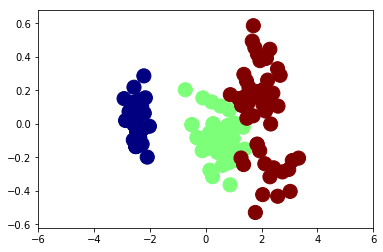

In [283]:
plt.scatter(X2[:,0], X2[:,1], c=iris.target, s=200, cmap=plt.cm.jet)   #정규화시킨 결과이므로 1st component가 세로로 길쭉한 방향
plt.xlim(-6, 6)                                                             #가로축은 1st component의 분산이 된다
plt.show()                                                                  #위 그림과 폭이 조금 달라보이는 이유는, 축의 비율 때문

In [284]:
model1.components_

array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])

In [285]:
#이번엔 1st component만 뽑아보자

In [286]:
model2 = PCA(1).fit(X[[2,3]])
X3 = model2.transform(X[[2,3]])

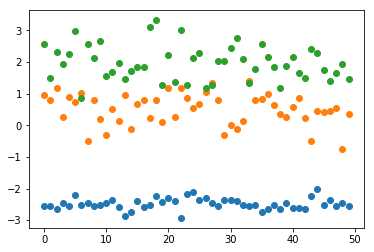

In [287]:
plt.plot(X3[iris.target==0], "o")
plt.plot(X3[iris.target==1], "o")
plt.plot(X3[iris.target==2], "o");

In [288]:
#이번엔 그냥 전체 데이터 (변수4개)를 2개로 줄여보자

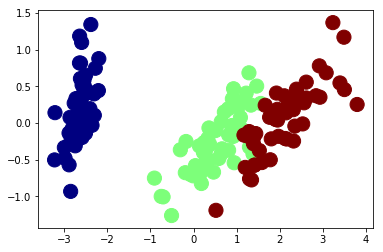

In [289]:
model3 = PCA(2).fit(iris.data)
X4 = model3.fit_transform(iris.data)
plt.scatter(X4[:, 0], X4[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

In [290]:
model3.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [304]:
#변수 4개를 3개로 줄여보자

In [309]:
model4 = PCA(3).fit(iris.data)
X5 = model4.fit_transform(iris.data)

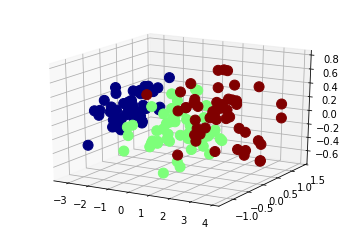

In [310]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X5[:,0], X5[:,1], X5[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

plot_pca(-60)

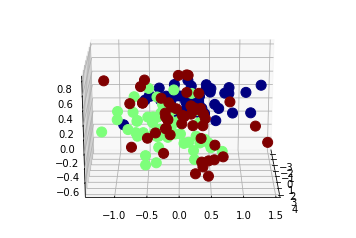

In [314]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

In [324]:
model4.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091]])

In [326]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [331]:
 np.matrix(iris.data) * np.matrix(model4.components_).T   #원래 데이터 4개 변수에 component를 곱해주면, 3개변수 새 값이 튀어나옴

matrix([[ 2.82713597,  5.64133105, -0.66427693],
        [ 2.79595248,  5.14516688, -0.84628652],
        [ 2.62152356,  5.17737812, -0.61805585],
        [ 2.7649059 ,  5.00359942, -0.60509312],
        [ 2.78275012,  5.64864829, -0.54653539],
        [ 3.23144574,  6.06250644, -0.46843948],
        [ 2.69045242,  5.23261922, -0.37851401],
        [ 2.8848611 ,  5.48512908, -0.6585666 ],
        [ 2.62338453,  4.7439257 , -0.61542969],
        [ 2.83749841,  5.20803203, -0.83429839],
        [ 3.00481631,  5.96665874, -0.71204009],
        [ 2.89820038,  5.33624436, -0.53511474],
        [ 2.72390912,  5.08698354, -0.84309288],
        [ 2.28614265,  4.81144382, -0.57435147],
        [ 2.86779988,  6.50091863, -0.7872708 ],
        [ 3.12747377,  6.65947808, -0.35903443],
        [ 2.88881689,  6.13281341, -0.49744911],
        [ 2.86302037,  5.6338604 , -0.60937084],
        [ 3.31226514,  6.19396782, -0.75728656],
        [ 2.92399691,  5.83519737, -0.42319301],
        [ 3.2008114 

### PCA - boston house data

In [298]:
import statsmodels.api as sm
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

from patsy import dmatrix

formula = "scale(CRIM) + scale(ZN) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [299]:
idx_outlier = \
    np.array([  7,  54, 148, 152, 160, 214, 267, 364, 365, 367, 368, 369, 371,
              372, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410, 412, 413,
              415, 416, 418, 419, 426, 466, 489, 490, 492, 495, 505, 161, 162,
              163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369, 370, 371, 372])
    
idx = list(set(range(len(dfX))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

In [300]:
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     223.9
Date:                Fri, 14 Sep 2018   Prob (F-statistic):          1.49e-185
Time:                        15:45:19   Log-Likelihood:                 302.66
No. Observations:                 458   AIC:                            -577.3
Df Residuals:                     444   BIC:                            -519.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [302]:
dfX2 = sm.add_constant(pd.DataFrame(PCA(n_components=8).fit_transform(dfX)))
model_boston2 = sm.OLS(np.log(dfy), dfX2)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     287.0
Date:                Fri, 14 Sep 2018   Prob (F-statistic):          3.47e-171
Time:                        15:47:29   Log-Likelihood:                 254.16
No. Observations:                 458   AIC:                            -490.3
Df Residuals:                     449   BIC:                            -453.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0391      0.007    463.560      0.0

In [303]:
pd.DataFrame(PCA(n_components=8).fit_transform(dfX))

,0,1,2,3,4,5,6,7
0,-2.025301,-0.468746,1.305461,0.048286,-0.096689,0.119698,-0.530601,0.303620
1,-1.229578,-1.071830,-0.104948,0.336908,0.369650,-0.327933,-0.370065,-0.298774
2,-2.060880,-0.357475,0.473726,1.481905,0.502264,0.250846,-0.021144,-0.001761
3,-2.710158,-0.024065,-0.103727,1.603851,0.635596,0.474923,-0.330133,0.381268
4,-2.335981,-0.257179,-0.136942,1.379487,0.651275,-0.047628,-0.504689,-0.008594
5,-2.108674,-0.527735,-0.518606,0.766060,0.569648,0.069337,-0.575239,0.181731
6,-1.102785,-0.717952,0.503141,-1.001022,-0.215820,0.192467,-0.649326,-0.720679
7,-0.182026,-1.409838,0.235702,-1.841047,-0.154158,-0.912106,-1.043535,-1.322416
8,-0.793456,-0.935076,0.478884,-1.209867,-0.099739,-0.429798,-0.829300,-1.153451
9,-0.679573,-0.987772,0.722351,-0.939136,-0.101633,-0.824374,-0.871627,-1.354487


In [335]:
PCA(n_components=8).fit(dfX).components_    #14개의 변수를 8개로 줄이는 component

array([[ 0.00000000e+00,  1.86961248e-01, -2.67775561e-01,
         3.55616728e-01,  3.63477137e-01, -1.77919467e-01,
         3.31729922e-01, -3.46071351e-01,  3.09818587e-01,
         3.28357655e-01,  1.88519446e-01, -1.78780458e-01,
         3.19354865e-01,  1.23563237e-03],
       [-0.00000000e+00,  2.41617107e-01,  4.42424105e-01,
        -3.07841749e-02, -5.59734396e-02,  2.33618404e-01,
        -2.98431308e-01,  1.79788233e-01,  4.79770351e-01,
         4.29615774e-01,  1.07982103e-01, -3.21426113e-01,
        -1.88272450e-01, -2.58472811e-02],
       [-0.00000000e+00, -1.84400415e-02,  1.38325556e-01,
         2.92668860e-02,  3.21786921e-01,  4.20586786e-01,
         2.22560251e-01, -2.83885471e-01, -4.32788578e-02,
        -2.45475386e-02, -7.08804973e-01, -1.70267934e-01,
        -1.86320585e-01,  2.27749886e-02],
       [-0.00000000e+00, -8.12424172e-02, -4.20097210e-01,
        -1.42237695e-02, -3.88592884e-02,  6.25648253e-01,
         1.10667733e-01, -1.27670202e-01,  1.

=> 즉, PCA의 목적은 두가지 인 셈

    1) 고차원 데이터의 특성을 2차원이나 3차원의 저차원에 시각화 할때
    2) 고차원 데이터의 특성을 요약하여 자신이 원하는 차원갯수로 줄일 때 (여러 변수를 더 적은 갯수의 변수로 요약하여 줄일 때)
           -> 다만 이때, 약간의 정보 손실을 감수
           -> 변수들 전체 분산을 쓰긴 하지만, 실제 모형에 투입할 때는 힘이 약한 새변수를 버리고 힘이 강한 새변수만 쓰기 때문
               =feature selection
               
           -> 무언가 말을 할 때 내용을 요약하여 말하면, 디테일 잡것은 빠지되, 핵심 흐름만 말하는 것과 같음
           
    => 결국, dimension reduction의 가장 기초 개념임

## Exploratory factor analysis (EFA)

In [ ]:
#다른 자료로 대체